# Cinema Audience Forecasting

This notebook explores the dataset for the Cinema Audience Forecasting challenge. We'll load the data, perform some basic exploratory data analysis (EDA), and visualize the audience trends. The goal is to provide a clean and well-structured starting point.

## 1. Import Libraries

First, we import the necessary libraries for data manipulation and visualization.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configure plotting style
sns.set_theme(style='whitegrid')

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


## 1. Import Libraries

First, we import the necessary libraries for data manipulation and visualization.

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configure plotting style
sns.set_theme(style='whitegrid')

## 3. Exploratory Data Analysis (EDA)

Let's inspect the dataset to understand its structure, check for missing values, and review basic summary statistics.

In [3]:
# Display basic information about the dataset
print('Dataset Info:')
print('-' * 40)
booknow.info()
print('\n')

print('Summary Statistics:')
print('-' * 40)
display(booknow.describe())
print('\n')

print('Date Range:', booknow['show_date'].min(), 'to', booknow['show_date'].max())
print('Unique theaters:', booknow['book_theater_id'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  214046 non-null  object
 1   show_date        214046 non-null  object
 2   audience_count   214046 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB
None
       audience_count
count   214046.000000
mean        41.616568
std         32.834918
min          2.000000
25%         18.000000
50%         34.000000
75%         58.000000
max       1350.000000

Booknow date range: 2023-01-01 to 2024-02-28

Unique theaters in booknow: 826


### 3.1 Weekly Audience Trends

We analyze the average audience count per day of the week to identify any weekly patterns. Understanding these trends is crucial since theater attendance typically exhibits strong seasonality (e.g., higher turnouts on weekends).

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


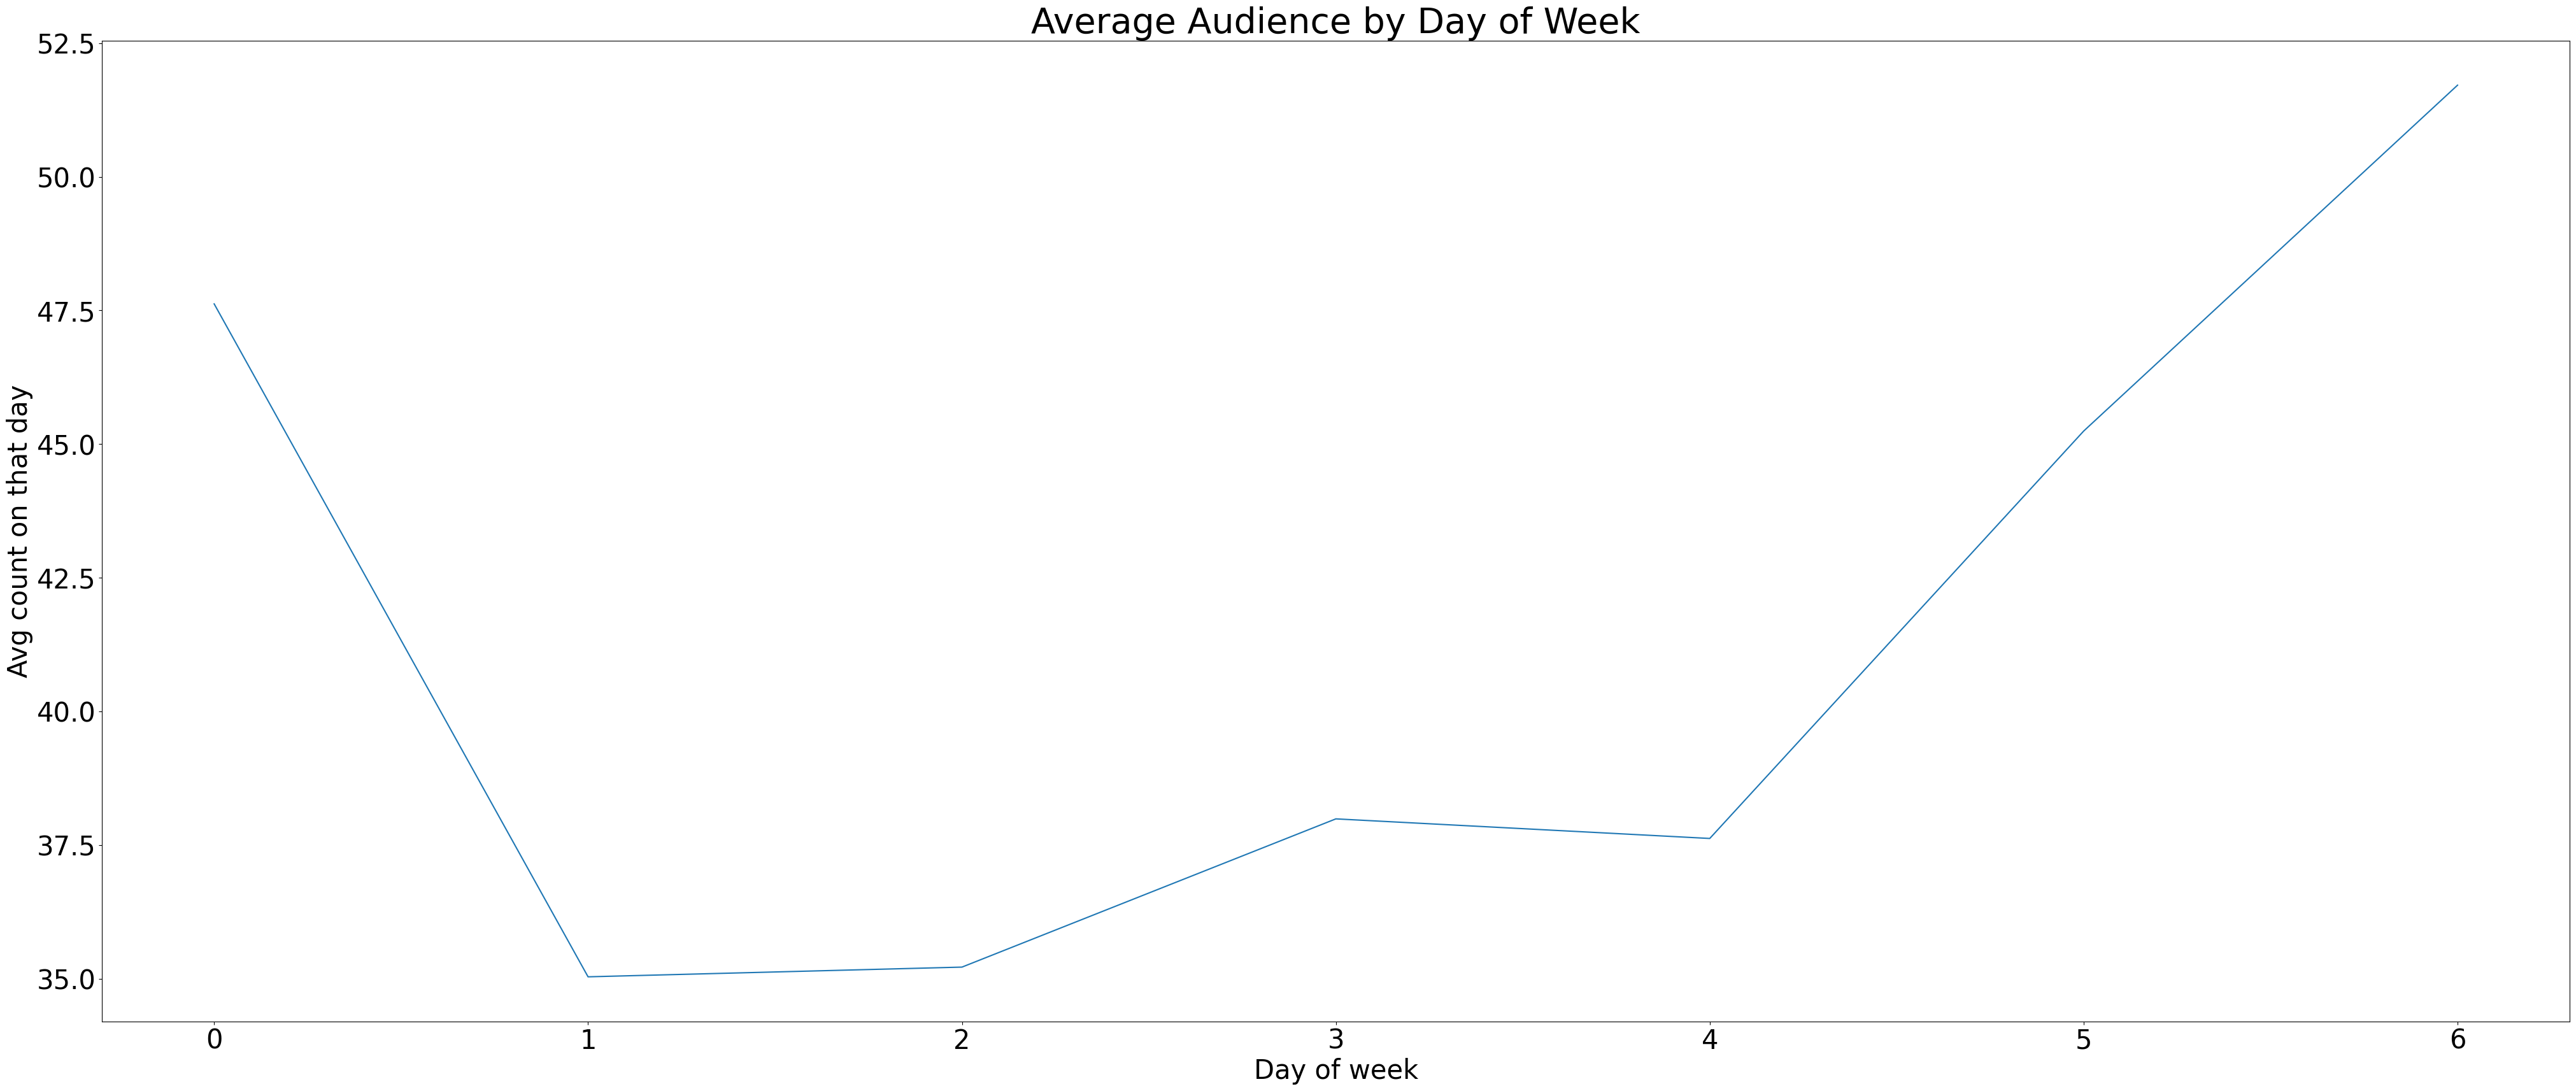

In [5]:
# Convert show_date to datetime to extract the day of the week
booknow['show_date'] = pd.to_datetime(booknow['show_date'])

# Calculate average audience count by day of the week
# Day of week: 0 = Monday, 6 = Sunday
daily = booknow.groupby(booknow['show_date'].dt.dayofweek)['audience_count'].mean().reset_index()

# Map integer days to day names for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily['day_name'] = daily['show_date'].map(day_names)

# Visualize the target trends
plt.figure(figsize=(12, 6))
sns.barplot(data=daily, x='day_name', y='audience_count', color='skyblue')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Audience Count', fontsize=12)
plt.title('Average Audience by Day of Week', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Audience by month')

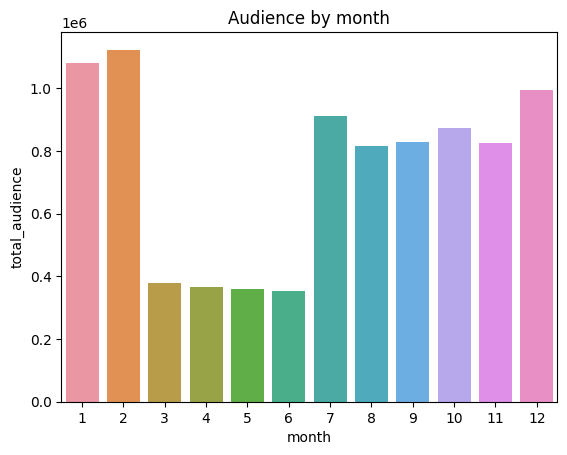

In [6]:
#Month trends
month=booknow.groupby(pd.to_datetime(booknow['show_date']).dt.month)['audience_count'].sum().reset_index()
month.columns = ['month','total_audience']
sns.barplot(data=month,x='month', y='total_audience')
plt.title("Audience by month")

In [7]:
#we have to merge the booknow and sample sub cols but they are of different formats so we will split the id of sample submission as book_theater_id and show_date
booknow['show_date']=pd.to_datetime(booknow['show_date'])
booknow=booknow.sort_values(['book_theater_id','show_date'])

sample_sub['book_theater_id']=sample_sub['ID'].str.rsplit('_',n=1).str[0]
sample_sub['show_date']=pd.to_datetime(sample_sub['ID'].str.rsplit('_',n=1).str[1])



In [8]:
print(booknow.head())
print(sample_sub.head())

  book_theater_id  show_date  audience_count
0      book_00001 2023-01-13              50
1      book_00001 2023-01-14              64
2      book_00001 2023-01-15              58
3      book_00001 2023-01-16              44
4      book_00001 2023-01-18              12
                      ID  audience_count book_theater_id  show_date
0  book_00001_2024-03-01               0      book_00001 2024-03-01
1  book_00001_2024-03-02               0      book_00001 2024-03-02
2  book_00001_2024-03-03               0      book_00001 2024-03-03
3  book_00001_2024-03-04               0      book_00001 2024-03-04
4  book_00001_2024-03-06               0      book_00001 2024-03-06


In [9]:
#Adding useful features like lag and roll
booknow['day_of_week']=booknow['show_date'].dt.dayofweek
booknow['month']=booknow['show_date'].dt.month
booknow['week_of_year']=booknow['show_date'].dt.isocalendar().week.astype(int)
booknow['is_weekend']=booknow['day_of_week'].isin([5,6]).astype(int)

booknow['lag1']=booknow.groupby('book_theater_id')['audience_count'].shift(1)
booknow['lag7']=booknow.groupby('book_theater_id')['audience_count'].shift(7)
booknow['lag30']=booknow.groupby('book_theater_id')['audience_count'].shift(30)

booknow['roll7_mean']=booknow.groupby('book_theater_id')['audience_count'].shift(1).rolling(7).mean()
booknow['roll30_mean']=booknow.groupby('book_theater_id')['audience_count'].shift(1).rolling(30).mean()

In [10]:
from sklearn.preprocessing import LabelEncoder
all_theaters=pd.concat([booknow['book_theater_id'],sample_sub['book_theater_id']]).unique()
le=LabelEncoder().fit(all_theaters)
booknow['theater_enc']=le.transform(booknow['book_theater_id'])
sample_sub['theater_enc']=le.transform(sample_sub['book_theater_id'])

feature=['theater_enc','day_of_week','month','week_of_year','is_weekend','lag1','lag7','lag30','roll7_mean','roll30_mean']

Text(0.5, 1.0, 'Feature correlations with audience_count')

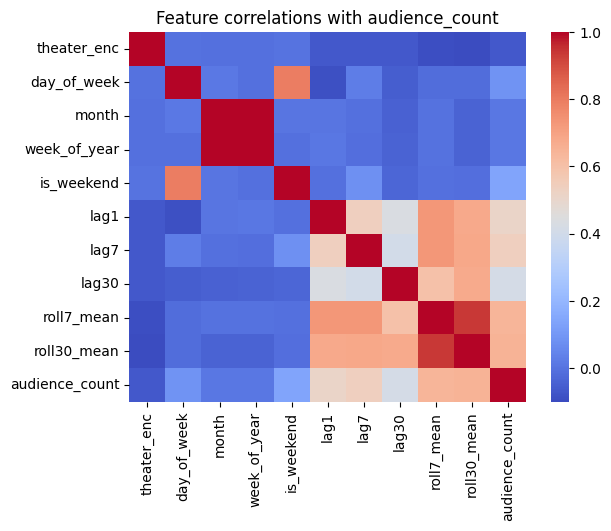

In [12]:
cor=booknow[feature+['audience_count']].corr()
sns.heatmap(cor,cmap='coolwarm')
plt.title("Feature correlations with audience_count")

## Some Insights from EDA

- **Audience trends:** Attendance shows clear weekly seasonality — weekends consistently have higher counts than weekdays.
- **Lag features:** Strong correlation between lag1 and current audience count, confirming short-term dependency. Lag7 captures weekly cycles.
- **Rolling averages:** roll7_mean smooths daily fluctuations and highlights weekly trend; roll30_mean captures longer-term seasonality.
- **Categorical features:** Theater IDs vary in baseline audience levels, suggesting theater-specific effects are important.
- **Correlation check:** Lag features and rolling features are naturally correlated (e.g., lag7 vs roll7_mean), but each adds unique signal.
- **Distribution:** Audience counts are right-skewed, with occasional spikes (special events or holidays).

In [ ]:
#train and valid split
train_df=booknow[booknow['audience_count'].notna()].sort_values('show_date')
cutoff=train_df['show_date'].max()-pd.Timedelta(days=45)

train_set=train_df[train_df['show_date']<=cutoff].copy()
valid_set=train_df[train_df['show_date']>cutoff].copy()

x_train=train_set[feature].fillna(0)
y_train=train_set['audience_count']
x_valid=valid_set[feature].fillna(0)
y_valid=valid_set['audience_count']

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

param_candidates = [
    {'learning_rate':0.02,'num_leaves':128,'max_depth':8,'min_data_in_leaf':50},
    {'learning_rate':0.02,'num_leaves':256,'max_depth':10,'min_data_in_leaf':100},
    {'learning_rate':0.03,'num_leaves':128,'max_depth':8,'min_data_in_leaf':100}
]

best_score=-1e9
best_model=None

# Trying each candidate
for params in param_candidates:
    model = LGBMRegressor(
        n_estimators=3000,
        objective='regression',
        feature_fraction=0.8,
        bagging_fraction=0.8,
        bagging_freq=1,
        lambda_l1=0.1,
        lambda_l2=0.1,
        **params
    )
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)])
    
    score=r2_score(y_valid, model.predict(x_valid))
    if score > best_score:
        best_score=score
        best_model=model

In [ ]:
print("Best LightGBM R2:", best_score)

In [ ]:
#this grid search appraoch takes too much time
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# xgb_pipe = Pipeline([
#     ('imputer',SimpleImputer(strategy='constant',fill_value=0)),
#     ('model',XGBRegressor(
#         objective='reg:squarederror',
#         n_estimators=2000, 
#         eval_metric='rmse',
#         verbosity=0             
#     ))
# ])

# param_grid = {
#     'model__eta':[0.02,0.05],
#     'model__max_depth':[6,8,10],
#     'model__subsample':[0.8,1.0],
#     'model__colsample_bytree':[0.8, 1.0],
#     'model__min_child_weight':[10, 20],
#     'model__reg_alpha':[0.1, 0.5],
#     'model__reg_lambda':[1.0, 2.0]
# }

# grid = GridSearchCV(
#     estimator=xgb_pipe,
#     param_grid=param_grid,
#     cv=3,
#     scoring='r2',
#     verbose=1,
#     n_jobs=-1
# )

# grid.fit(x_train, y_train)

# print("Best params:",grid.best_params_)
# print("Best CV R2:",grid.best_score_)
# print("Validation R2:",r2_score(y_valid,grid.best_estimator_.predict(x_valid)))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

xgb_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='constant',fill_value=0)),
    ('model',XGBRegressor(
        objective='reg:squarederror',
        n_estimators=2000, 
        eval_metric='rmse',
        verbosity=0             
    ))
])

param_grid = {
    'model__eta':[0.02,0.05],
    'model__max_depth':[6,8,10],
    'model__subsample':[0.8,1.0],
    'model__colsample_bytree':[0.8, 1.0],
    'model__min_child_weight':[10, 20],
    'model__reg_alpha':[0.1, 0.5],
    'model__reg_lambda':[1.0, 2.0]
}

grid = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_grid,
    cv=3,
    n_iter=20,
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grid.fit(x_train, y_train)

print("Best params:",grid.best_params_)
print("Best CV R2:",grid.best_score_)
print("Validation R2:",r2_score(y_valid,grid.best_estimator_.predict(x_valid)))

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train,y_train)
print("RandomForest R2 (valid):",r2_score(y_valid,rf_model.predict(x_valid)))

In [ ]:
#building sample_sub features with backfilled lags and rolling
sample_sub['day_of_week']=sample_sub['show_date'].dt.dayofweek
sample_sub['month']=sample_sub['show_date'].dt.month
sample_sub['week_of_year']=sample_sub['show_date'].dt.isocalendar().week.astype(int)
sample_sub['is_weekend']=sample_sub['day_of_week'].isin([5,6]).astype(int)

last_feat=booknow.groupby('book_theater_id')[['lag1','lag7','lag30','roll7_mean','roll30_mean']].last().reset_index()

sample_sub=sample_sub.merge(last_feat,on='book_theater_id',how='left')
x_test=sample_sub[feature].fillna(0)

In [ ]:
#stacking both the models
y_pred_lgb=best_model.predict(x_test)
y_pred_xgb=grid.best_estimator_.predict(x_test)
y_pred_rf=rf_model.predict(x_test)

y_pred_final=0.5*y_pred_lgb+0.5*y_pred_rf

sample_sub['audience_count']=y_pred_final
sample_sub[['ID','audience_count']].to_csv("submission.csv",index=False)
print("Saved submission_simple_lgb_xgb.csv with",len(y_pred_final),"rows.")

## 2. Load Data

We load the datasets provided for the challenge. The primary dataset is `booknow_visits.csv`, which contains information regarding theater visits by date.

In [ ]:
# Load the training data (booknow visits) and sample submission
booknow = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv')
sample_sub = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv')

# Display the first few rows of the training data
booknow.head()